In [1]:
import pandas as pd
# чтоб картинки рисовались в тетрадке
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 8)

In [25]:
import numpy as np

In [150]:
data = pd.read_csv('e:/Machine_Learning/datasets/adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [151]:
print(data.shape)

(32561, 15)


In [152]:
print(data.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')


In [153]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


1. Сколько мужчин и женщин (признак sex) представлено в этом наборе данных?

In [154]:
data['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

$2$. Каков средний возраст (признак age) женщин?

In [155]:
columns_to_show = ['age']
data.groupby(['sex'])[columns_to_show].agg([np.mean])

,age
,mean
sex,
Female,36.858230
Male,39.433547


In [156]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


$3$. Какова доля граждан Германии (признак native-country)?

In [157]:
df=data['native-country'].value_counts(normalize=True)
df


 United-States                 0.895857
 Mexico                        0.019748
 ?                             0.017905
 Philippines                   0.006081
 Germany                       0.004207
 Canada                        0.003716
 Puerto-Rico                   0.003501
 El-Salvador                   0.003255
 India                         0.003071
 Cuba                          0.002918
 England                       0.002764
 Jamaica                       0.002488
 South                         0.002457
 China                         0.002303
 Italy                         0.002242
 Dominican-Republic            0.002150
 Vietnam                       0.002058
 Guatemala                     0.001966
 Japan                         0.001904
 Poland                        0.001843
 Columbia                      0.001812
 Taiwan                        0.001566
 Haiti                         0.001351
 Iran                          0.001321
 Portugal                      0.001136


$4$. Постройте гистограмму распределения (bar plot) образования людей (признак education)

In [158]:
edu=data['education'].value_counts()
edu

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

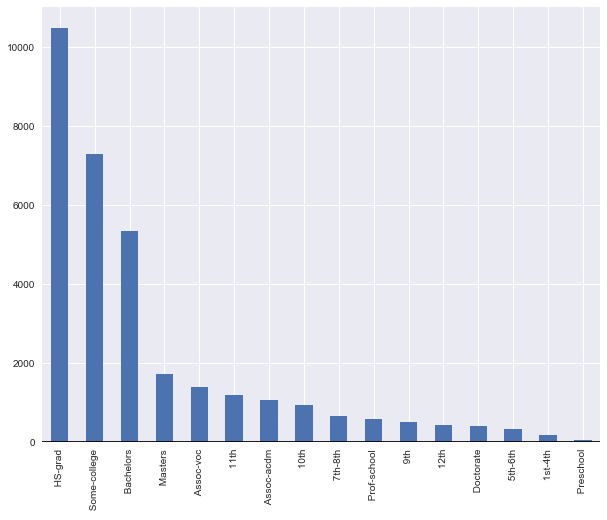

In [159]:
plt.figure()
edu.plot.bar(); plt.axhline(1, color='k')

$5$. Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?

In [160]:
data['salary>50K'] = (data['salary'] !=' <=50K').astype('int')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [161]:
columns_to_show = ['age']

data.groupby(['salary>50K'])[columns_to_show].describe(percentiles=[])

age                                        
              count       mean        std   min   50%   max
salary>50K                                                 
0           24720.0  36.783738  14.020088  17.0  34.0  90.0
1            7841.0  44.249841  10.519028  19.0  44.0  90.0

$6.$ Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [162]:
columns_to_show = ['salary>50K']

data.groupby(['education'])[columns_to_show].describe(percentiles=[])


salary>50K                                   
                   count      mean       std  min  50%  max
education                                                  
 10th              933.0  0.066452  0.249205  0.0  0.0  1.0
 11th             1175.0  0.051064  0.220222  0.0  0.0  1.0
 12th              433.0  0.076212  0.265645  0.0  0.0  1.0
 1st-4th           168.0  0.035714  0.186132  0.0  0.0  1.0
 5th-6th           333.0  0.048048  0.214190  0.0  0.0  1.0
 7th-8th           646.0  0.061920  0.241196  0.0  0.0  1.0
 9th               514.0  0.052529  0.223309  0.0  0.0  1.0
 Assoc-acdm       1067.0  0.248360  0.432264  0.0  0.0  1.0
 Assoc-voc        1382.0  0.261216  0.439456  0.0  0.0  1.0
 Bachelors        5355.0  0.414753  0.492725  0.0  0.0  1.0
 Doctorate         413.0  0.740920  0.438661  0.0  1.0  1.0
 HS-grad         10501.0  0.159509  0.366167  0.0  0.0  1.0
 Masters          1723.0  0.556587  0.496932  0.0  1.0  1.0
 Preschool          51.0  0.000000  0.000000  0.0  0.0  0.0
 Prof-school       576.0  0.734375  0.442049  0.0  1.0  1.0
 Some-college     7291.0  0.190235  0.392513  0.0  0.0  1.0

In [163]:
#data.loc[0:20,'education':'education-num']

In [164]:
columns_to_show = ['education-num']

data.groupby(['education'])[columns_to_show].describe(percentiles=[])

education-num                             
                      count  mean  std   min   50%   max
education                                               
 10th                 933.0   6.0  0.0   6.0   6.0   6.0
 11th                1175.0   7.0  0.0   7.0   7.0   7.0
 12th                 433.0   8.0  0.0   8.0   8.0   8.0
 1st-4th              168.0   2.0  0.0   2.0   2.0   2.0
 5th-6th              333.0   3.0  0.0   3.0   3.0   3.0
 7th-8th              646.0   4.0  0.0   4.0   4.0   4.0
 9th                  514.0   5.0  0.0   5.0   5.0   5.0
 Assoc-acdm          1067.0  12.0  0.0  12.0  12.0  12.0
 Assoc-voc           1382.0  11.0  0.0  11.0  11.0  11.0
 Bachelors           5355.0  13.0  0.0  13.0  13.0  13.0
 Doctorate            413.0  16.0  0.0  16.0  16.0  16.0
 HS-grad            10501.0   9.0  0.0   9.0   9.0   9.0
 Masters             1723.0  14.0  0.0  14.0  14.0  14.0
 Preschool             51.0   1.0  0.0   1.0   1.0   1.0
 Prof-school          576.0  15.0  0.0  15.0  15.0  15.0
 Some-college        7291.0  10.0  0.0  10.0  10.0  10.0

То есть для высшего образования надо, чтобы 'education-num' >10

In [165]:
data['higher'] = (data['education-num'] >10).astype('int')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary>50K,higher
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,1


In [166]:
pd.crosstab(data['salary>50K'],data['higher'],margins=True)

higher,0,1,All
salary>50K,,,
0,18739,5981,24720
1,3306,4535,7841
All,22045,10516,32561


$7.$ Выведите статистику возраста для каждой расы (признак race) и каждого пола. Используйте groupby и describe. Найдите таким образом максимальный возраст мужчин расы Amer-Indian-Eskimo.

In [167]:
d = {' Male': 1, ' Female' : 0}
data['sex'] = data['sex'].map(d)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary>50K,higher
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,<=50K,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,<=50K,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,<=50K,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,<=50K,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,<=50K,0,1


In [168]:
columns_to_show = ['sex','age']

data.groupby(['race'])[columns_to_show].describe() # не совсем то, что просят найти. Здесь данные по мужчинам и женщинам вместе

sex                                               \
                       count      mean       std  min  25%  50%  75%  max   
race                                                                        
 Amer-Indian-Eskimo    311.0  0.617363  0.486814  0.0  0.0  1.0  1.0  1.0   
 Asian-Pac-Islander   1039.0  0.666987  0.471518  0.0  0.0  1.0  1.0  1.0   
 Black                3124.0  0.502241  0.500075  0.0  0.0  1.0  1.0  1.0   
 Other                 271.0  0.597786  0.491252  0.0  0.0  1.0  1.0  1.0   
 White               27816.0  0.689316  0.462782  0.0  0.0  1.0  1.0  1.0   

                         age                                                \
                       count       mean        std   min   25%   50%   75%   
race                                                                         
 Amer-Indian-Eskimo    311.0  37.173633  12.447130  17.0  28.0  35.0  45.5   
 Asian-Pac-Islander   1039.0  37.746872  12.825133  17.0  28.0  36.0  45.0   
 Black                3124.0  37.767926  12.759290  17.0  28.0  36.0  46.0   
 Other                 271.0  33.457565  11.538865  17.0  25.0  31.0  41.0   
 White               27816.0  38.769881  13.782306  17.0  28.0  37.0  48.0   

                           
                      max  
race                       
 Amer-Indian-Eskimo  82.0  
 Asian-Pac-Islander  90.0  
 Black               90.0  
 Other               77.0  
 White               90.0

In [169]:
data.pivot_table(['sex','age'],['race'],aggfunc='mean').head()

,age,sex
race,,
Amer-Indian-Eskimo,37.173633,0.617363
Asian-Pac-Islander,37.746872,0.666987
Black,37.767926,0.502241
Other,33.457565,0.597786
White,38.769881,0.689316


In [170]:
men=data[data['sex']==1]
men.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary>50K,higher
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,<=50K,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,<=50K,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,<=50K,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,<=50K,0,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,45,United-States,>50K,1,0


In [171]:
men.groupby(['race'])['age'].describe() #информация о мужчинах

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
Amer-Indian-Eskimo,192.0,37.208333,12.049563,17.0,28.0,35.0,45.0,82.0
Asian-Pac-Islander,693.0,39.073593,12.883944,18.0,29.0,37.0,46.0,90.0
Black,1569.0,37.682600,12.882612,17.0,27.0,36.0,46.0,90.0
Other,162.0,34.654321,11.355531,17.0,26.0,32.0,42.0,77.0
White,19174.0,39.652498,13.436029,17.0,29.0,38.0,49.0,90.0


$8.$ Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [176]:
m={' Married-civ-spouse':1,' Married-spouse-absent':1,' Married-AF-spouse':1,' Never-married':0, ' Divorced':0, ' Separated':0, ' Widowed':0}

In [174]:
data.groupby(['marital-status'])['salary>50K'].describe()

,count,mean,std,min,25%,50%,75%,max
marital-status,,,,,,,,
Divorced,4443.0,0.104209,0.305566,0.0,0.0,0.0,0.0,1.0
Married-AF-spouse,23.0,0.434783,0.506870,0.0,0.0,0.0,1.0,1.0
Married-civ-spouse,14976.0,0.446848,0.497183,0.0,0.0,0.0,1.0,1.0
Married-spouse-absent,418.0,0.081340,0.273684,0.0,0.0,0.0,0.0,1.0
Never-married,10683.0,0.045961,0.209410,0.0,0.0,0.0,0.0,1.0
Separated,1025.0,0.064390,0.245567,0.0,0.0,0.0,0.0,1.0
Widowed,993.0,0.085599,0.279912,0.0,0.0,0.0,0.0,1.0


In [177]:
data['married'] = data['marital-status'].map(m)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary>50K,higher,married
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,<=50K,0,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,<=50K,0,1,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,<=50K,0,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,<=50K,0,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,<=50K,0,1,1


In [178]:
pd.crosstab(data['married'],data['salary>50K'],margins=True)

salary>50K,0,1,All
married,,,
0,16039,1105,17144
1,8681,6736,15417
All,24720,7841,32561


$8.$ Какое максимальное число часов человек работает в неделю (признак hours-per-week)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?

In [179]:
data['hours-per-week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [182]:
data[data['hours-per-week']==99]['salary>50K'].describe()

count    85.000000
mean      0.294118
std       0.458349
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: salary>50K, dtype: float64

In [184]:
hard_working=data[data['hours-per-week']==99]
hard_working

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary>50K,higher,married
935,37,Private,176900,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,1,0,0,99,United-States,>50K,1,0,1
1172,25,Private,404616,Masters,14,Married-civ-spouse,Farming-fishing,Not-in-family,White,1,0,0,99,United-States,>50K,1,1,1
1887,55,Self-emp-not-inc,184425,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,99,United-States,>50K,1,0,1
3578,37,Self-emp-inc,382802,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Black,1,0,0,99,United-States,>50K,1,1,1
4086,50,?,174964,10th,6,Married-civ-spouse,?,Husband,White,1,0,0,99,United-States,<=50K,0,0,1
4308,35,Self-emp-not-inc,166416,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,99,United-States,<=50K,0,0,1
4441,43,Self-emp-inc,286750,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Black,1,0,0,99,United-States,>50K,1,1,1
5376,43,Private,86750,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,1,0,0,99,United-States,<=50K,0,1,1
5432,44,Private,83508,Prof-school,15,Divorced,Prof-specialty,Not-in-family,White,0,2354,0,99,United-States,<=50K,0,1,0
6618,27,Private,336951,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,1,0,0,99,United-States,<=50K,0,0,1


In [185]:
hard_working.describe()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary>50K,higher,married
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.0,85.000000,85.000000,85.000000
mean,43.517647,161462.129412,10.611765,0.776471,799.529412,125.717647,99.0,0.294118,0.447059,0.635294
std,13.339533,103387.089190,3.415978,0.419083,2932.860012,508.916838,0.0,0.458349,0.500140,0.484204
min,19.000000,24790.000000,4.000000,0.000000,0.000000,0.000000,99.0,0.000000,0.000000,0.000000
25%,34.000000,89681.000000,9.000000,1.000000,0.000000,0.000000,99.0,0.000000,0.000000,0.000000
50%,42.000000,158712.000000,10.000000,1.000000,0.000000,0.000000,99.0,0.000000,0.000000,1.000000
75%,51.000000,208826.000000,13.000000,1.000000,0.000000,0.000000,99.0,1.000000,1.000000,1.000000
max,90.000000,511289.000000,16.000000,1.000000,15024.000000,2415.000000,99.0,1.000000,1.000000,1.000000


In [189]:
hard_working['salary>50K'].value_counts(normalize=True)

0    0.705882
1    0.294118
Name: salary>50K, dtype: float64

$9.$ Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).

In [197]:
much=data[data['salary>50K']==1]
much.describe()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary>50K,higher,married
count,7841.000000,7.841000e+03,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000,7841.0,7841.000000,7841.000000
mean,44.249841,1.880050e+05,11.611657,0.849637,4006.142456,195.001530,45.473026,1.0,0.578370,0.859074
std,10.519028,1.025418e+05,2.385129,0.357450,14570.378951,595.487574,11.012971,0.0,0.493851,0.347967
min,19.000000,1.487800e+04,2.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,0.000000
25%,36.000000,1.191010e+05,10.000000,1.000000,0.000000,0.000000,40.000000,1.0,0.000000,1.000000
50%,44.000000,1.761010e+05,12.000000,1.000000,0.000000,0.000000,40.000000,1.0,1.000000,1.000000
75%,51.000000,2.309590e+05,13.000000,1.000000,0.000000,0.000000,50.000000,1.0,1.000000,1.000000
max,90.000000,1.226583e+06,16.000000,1.000000,99999.000000,3683.000000,99.000000,1.0,1.000000,1.000000


In [196]:
much.pivot_table(['hours-per-week'],['native-country'],aggfunc='mean').head()


,hours-per-week
native-country,
?,45.547945
Cambodia,40.000000
Canada,45.641026
China,38.900000
Columbia,50.000000


In [198]:
min=data[data['salary>50K']==0]
min.pivot_table(['hours-per-week'],['native-country'],aggfunc='mean').head()

,hours-per-week
native-country,
?,40.164760
Cambodia,41.416667
Canada,37.914634
China,37.381818
Columbia,38.684211
